In [2]:
str = """
{
"first_name": "Homer",
"last_name": "Simpson",
"age":45,
"phones": [
    {"number": "987-555-1234", "type": "home"},
    {"number": "987-555-1212", "type": "cell"}
  ],
  "home_address": {
    "street": "742 Evergreen Terrace",
    "city": "Springfield"
  },
  "work_address": {
    "street": "10 Power Plant Lane",
    "city": "Springfield"
  }
  }
  """


"{\n\"first_name\": \"Homer\",\n\"last_name\": \"Simpson\",\n\"age\":45,\n\"phones\": [\n    {\"number\": \"987-555-1234\", \"type\": \"home\"},\n    {\"number\": \"987-555-1212\", \"type\": \"cell\"}\n  ],\n  \"home_address\": {\n    \"street\": \"742 Evergreen Terrace\",\n    \"city\": \"Springfield\"\n  },\n  \"work_address\": {\n    \"street\": \"10 Power Plant Lane\",\n    \"city\": \"Springfield\"\n  }\n  }\n  "

In [3]:
using PrettyPrint, Downloads, JSON, DataFrames, Chain

In [4]:
j = JSON.parse(str)

Dict{String, Any} with 6 entries:
  "first_name"   => "Homer"
  "home_address" => Dict{String, Any}("city"=>"Springfield", "street"=>"742 Eve…
  "phones"       => Any[Dict{String, Any}("number"=>"987-555-1234", "type"=>"ho…
  "work_address" => Dict{String, Any}("city"=>"Springfield", "street"=>"10 Powe…
  "last_name"    => "Simpson"
  "age"          => 45

In [5]:
menu = Dict("items" => [
  Dict("name" => "hamburger", "type" => "sandwich", "price" => "10.99"),
  Dict("name" => "Club Sandwich", "type" => "sandwich", "price" => "12.99"),
  Dict("name" => "spaghetti", "type" => "main", "price" => "14.99"),
  Dict("name" => "Caeasar Salad", "type" => "salad", "price" => "7.99"),
  Dict("name" => "Chococate Ice Cream", "type" => "dessert", "price" => "6.99"),
])

Dict{String, Vector{Dict{String, String}}} with 1 entry:
  "items" => [Dict("name"=>"hamburger", "price"=>"10.99", "type"=>"sandwich"), …

In [6]:
json_menu = JSON.json(menu)

"{\"items\":[{\"name\":\"hamburger\",\"price\":\"10.99\",\"type\":\"sandwich\"},{\"name\":\"Club Sandwich\",\"price\":\"12.99\",\"type\":\"sandwich\"},{\"name\":\"spaghetti\",\"price\":\"14.99\",\"type\":\"main\"},{\"name\":\"Caeasar Salad\",\"price\":\"7.99\",\"type\":\"salad\"},{\"name\":\"Chococate Ice Cream\",\"price\":\"6.99\",\"type\":\"dessert\"}]}"

In [7]:
pprintln(menu)

{
  "items" : [
              {"name" : "hamburger", 
               "price" : "10.99", 
               "type" : "sandwich"},
              {"name" : "Club Sandwich", 
               "price" : "12.99", 
               "type" : "sandwich"},
              {"name" : "spaghetti", 
               "price" : "14.99", 
               "type" : "main"},
              {"name" : "Caeasar Salad", 
               "price" : "7.99", 
               "type" : "salad"},
              {"name" : "Chococate Ice Cream", 
               "price" : "6.99", 
               "type" : "dessert"},
            ],
}


In [8]:
url = "https://geocoding.geo.census.gov/geocoder/locations/address?street=80+Causeway+St&city=Boston&state=MA&zip=02114&benchmark=Public_AR_Current&format=json"

"https://geocoding.geo.census.gov/geocoder/locations/address?street=80+Causeway+St&city=Boston&state=MA&zip=02114&benchmark=Public_AR_Current&format=json"

In [9]:
a = Downloads.request(url, output = "tdgarden.json")

Response("https", "https://geocoding.geo.census.gov/geocoder/locations/address?street=80+Causeway+St&city=Boston&state=MA&zip=02114&benchmark=Public_AR_Current&format=json", 200, "HTTP/1.1 200", ["date" => "Fri, 13 Dec 2024 20:43:51 GMT", "content-type" => "application/json", "content-length" => "661", "connection" => "keep-alive", "x-frame-options" => "DENY", "cache-control" => "private, no-store", "strict-transport-security" => "max-age=31536000", "x-content-type-options" => "nosniff", "x-xss-protection" => "1;mode=block", "vary" => "Origin", "set-cookie" => "TS0193e6a1=01283c52a4f4d34ea7b5504ba6850edd92b6fee5000020ecde9868b2425cca54dcad466558448571e7ba93be3a8b645dfb491934ba; Path=/; Domain=.geocoding.geo.census.gov; Secure; HttpOnly;"])

In [10]:
j = JSON.parsefile("tdgarden.json")

Dict{String, Any} with 1 entry:
  "result" => Dict{String, Any}("addressMatches"=>Any[Dict{String, Any}("tigerL…

In [11]:
pprintln(j)

{
  "result" : {
               "addressMatches" : [
                                    {
                                      "tigerLine" : {"side" : "L", 
                                                     "tigerLineId" : "85709714"},
                                      "coordinates" : {"x" : -71.063299192963, 
                                                       "y" : 42.364398683584},
                                      "addressComponents" : {"toAddress" : "50", 
                                                             "preQualifier" : "", 
                                                             "zip" : "02114", 
                                                             "state" : "MA", 
                                                             "preType" : "", 
                                                             "streetName" : "CAUSEWAY", 
                                                             "suffixType" : "ST", 
                            

In [12]:
j["result"]["addressMatches"][1]["coordinates"]

Dict{String, Any} with 2 entries:
  "x" => -71.0633
  "y" => 42.3644

In [13]:
j["result"]["addressMatches"][1]["coordinates"]

Dict{String, Any} with 2 entries:
  "x" => -71.0633
  "y" => 42.3644

In [14]:
struct Address
  street::String
  city::String
  state::String
  zip::String
end

In [15]:
function getCoordinates(add::Address)
  fields = String[]
  !isnothing(add.street) && push!(fields, "street=$(replace(add.street," " => "+"))")
  !isnothing(add.city) && push!(fields, "city=$(replace(add.city," " => "+"))")
  !isnothing(add.state) && push!(fields, "state=$(add.state)")
  !isnothing(add.zip) && push!(fields, "zip=$(add.zip)")
  url = "https://geocoding.geo.census.gov/geocoder/locations/address?" * join(fields,"&") * "&benchmark=Public_AR_Current&format=json"
  Downloads.request(url, output = "location.json")
  j = JSON.parsefile("location.json")
  j["result"]["addressMatches"][1]["coordinates"]
end

getCoordinates (generic function with 1 method)

In [16]:
getCoordinates(Address("100 Main St.", "Fitchburg" , "MA", "01420"  ))

Dict{String, Any} with 2 entries:
  "x" => -71.793
  "y" => 42.5817

In [17]:
Downloads.request("https://pro.openweathermap.org/data/2.5/forecast?lat=42.5817&lon=-71.793&units=imperial&appid=5a6e6bf61f0f285da7a9886694c04c87", output = "weather.json")

Response("https", "https://pro.openweathermap.org/data/2.5/forecast?lat=42.5817&lon=-71.793&units=imperial&appid=5a6e6bf61f0f285da7a9886694c04c87", 200, "HTTP/1.1 200 OK", ["server" => "openresty", "date" => "Fri, 13 Dec 2024 20:43:52 GMT", "content-type" => "application/json; charset=utf-8", "content-length" => "16006", "connection" => "keep-alive", "x-cache-key" => "/data/2.5/forecast?lat=42.58&lon=-71.79&units=imperial", "access-control-allow-origin" => "*", "access-control-allow-credentials" => "true", "access-control-allow-methods" => "GET, POST"])

In [18]:
weather = JSON.parsefile("weather.json")

Dict{String, Any} with 5 entries:
  "list"    => Any[Dict{String, Any}("visibility"=>10000, "pop"=>0, "sys"=>Dict…
  "message" => 0
  "cnt"     => 40
  "city"    => Dict{String, Any}("name"=>"Fitchburg", "coord"=>Dict{String, Any…
  "cod"     => "200"

In [19]:
pprintln(weather)

{
  "list" : [
             {
               "visibility" : 10000,
               "pop" : 0,
               "sys" : {"pod" : "d",},
               "dt" : 1734123600,
               "main" : {"temp_max" : 28.11, 
                         "feels_like" : 19.62, 
                         "pressure" : 1038, 
                         "temp_kf" : 1.23, 
                         "temp" : 28.11, 
                         "humidity" : 42, 
                         "temp_min" : 25.9, 
                         "grnd_level" : 1010, 
                         "sea_level" : 1038},
               "clouds" : {"all" : 0,},
               "weather" : [
                             {"icon" : "01d", 
                              "id" : 800, 
                              "main" : "Clear", 
                              "description" : "clear sky"},
                           ],
               "dt_txt" : "2024-12-13 21:00:00",
               "wind" : {"gust" : 17.11, 
                         "speed" : 8.79

In [20]:
weather_df = DataFrame(time = Int[], temp = Float64[], humidity = Int[], wind = Float64[], conditions = String[])

Row,time,temp,humidity,wind,conditions
,Int64,Float64,Int64,Float64,String


In [21]:
for w in weather["list"]
  weath =  (time = w["dt"], temp = w["main"]["temp"], humidity = w["main"]["humidity"], wind = w["wind"]["speed"], conditions = w["weather"][1]["main"])
  @show weath
end

weath = (time = 1734123600, temp = 28.11, humidity = 42, wind = 8.79, conditions = "Clear")
weath = (time = 1734134400, temp = 26.83, humidity = 47, wind = 6.44, conditions = "Clear")
weath = (time = 1734145200, temp = 24.82, humidity = 54, wind = 6.26, conditions = "Clear")
weath = (time = 1734156000, temp = 22.37, humidity = 66, wind = 5.59, conditions = "Clear")
weath = (time = 1734166800, temp = 21.29, humidity = 66, wind = 4, conditions = "Clear")
weath = (time = 1734177600, temp = 20.32, humidity = 67, wind = 3.36, conditions = "Clear")
weath = (time = 1734188400, temp = 27.16, humidity = 42, wind = 6.53, conditions = "Clear")
weath = (time = 1734199200, temp = 31.28, humidity = 31, wind = 6.06, conditions = "Clear")
weath = (time = 1734210000, temp = 26.87, humidity = 47, wind = 4.23, conditions = "Clear")
weath = (time = 1734220800, temp = 23.56, humidity = 62, wind = 2.86, conditions = "Clear")
weath = (time = 1734231600, temp = 22.73, humidity = 67, wind = 2.53, conditions = 

In [22]:
for w in weather["list"]
  append!(weather_df, [(time = w["dt"], temp = w["main"]["temp"], humidity = w["main"]["humidity"], wind = w["wind"]["speed"], conditions = w["weather"][1]["main"])])
end
weather_df

Row,time,temp,humidity,wind,conditions
,Int64,Float64,Int64,Float64,String
1,1734123600,28.11,42,8.79,Clear
2,1734134400,26.83,47,6.44,Clear
3,1734145200,24.82,54,6.26,Clear
4,1734156000,22.37,66,5.59,Clear
5,1734166800,21.29,66,4.0,Clear
6,1734177600,20.32,67,3.36,Clear
7,1734188400,27.16,42,6.53,Clear
8,1734199200,31.28,31,6.06,Clear
9,1734210000,26.87,47,4.23,Clear


In [27]:
weather2 = @chain weather_df begin
  transform(:time => (t-> (t .- weather_df.time[1] )/3600) => :time_hours)
end

Row,time,temp,humidity,wind,conditions,time_hours
,Int64,Float64,Int64,Float64,String,Float64
1,1734123600,28.11,42,8.79,Clear,0.0
2,1734134400,26.83,47,6.44,Clear,3.0
3,1734145200,24.82,54,6.26,Clear,6.0
4,1734156000,22.37,66,5.59,Clear,9.0
5,1734166800,21.29,66,4.0,Clear,12.0
6,1734177600,20.32,67,3.36,Clear,15.0
7,1734188400,27.16,42,6.53,Clear,18.0
8,1734199200,31.28,31,6.06,Clear,21.0
9,1734210000,26.87,47,4.23,Clear,24.0


In [ ]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

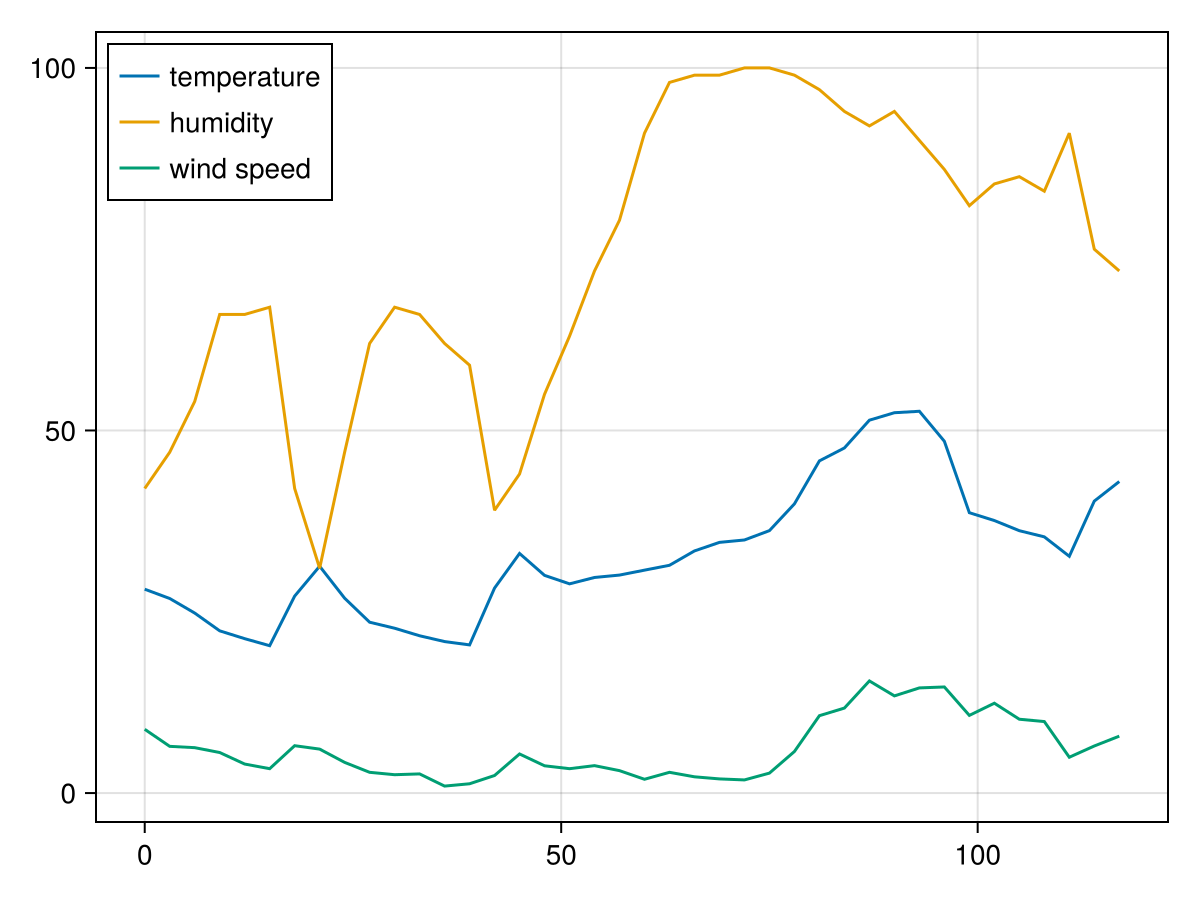

In [28]:
fig, ax = lines(weather2.time_hours, weather2.temp, label = "temperature")
lines!(ax,weather2.time_hours, weather2.humidity, label = "humidity")
lines!(ax,weather2.time_hours, weather2.wind, label = "wind speed")
axislegend(ax, position = :lt)
fig

In [31]:
save("../assets/plots/weather/weather.png", fig)

CairoMakie.Screen{IMAGE}
